**AIM**:To develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# API COMMAND FOR THE DATASET
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 64.1MB/s]


In [ ]:
# Unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the CSV file
df = pd.read_csv("/content/spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The given csv file was encoded with "latin1". we use head() to retrieve the 1st 5 rows of the data.

**UNDERSTANDIG THE DATASET**


THe dataset contains 5572 rows and 5 columns.

Column v1 contains the values Spam(Label for Spam Messages) and Ham(Non-Spam Messages).

Column v2 contains the content of the SMS.

Next 3 columns namely Unnamed: 2, Unnamed: 3, Unnamed: 4 contains NaN values.

**OBJECTIVES**

we will be dealing with

1.cleaning of the data

2.EDA- will be analysing the data

3.Text Processing

4.Model building-To predict the message we type on our mail is spam or not spam.

5.Evaluation

6.Improvement

7.Website

8.Deploy

In [ ]:
# Finding the total number of null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Since  our data contains columns with a quite large number of null values it requires preprocessing to extract only the relevant information.

***DATA CLEANING***

In [ ]:
# Getting the basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Dropping the columns with null vales
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

Here we drop the columns with extreme amout of null values and which are not much useful for the analysis.

In [ ]:
# Renaming the columns v1 and v2
df.rename(columns={'v1':'target','v2': 'content'}, inplace = True)
df.head()

,target,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


If it is a spam we will target it as spam. And the column v2 is of text messages.

In [ ]:
# Normalizing the target variables Spam and Ham Using LabelEncoder which assigns a unique integer to each class label.
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder ()
df['target'] = encoder.fit_transform(df ['target'])
df.head()


,target,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Here the v1 column which consist of spam or hams is now converted to 0 or 1.

In [ ]:
# Check for duplicate values entire row wise
df.duplicated().sum()

403

In [ ]:
# Removing the duplicate entries keeping the first entry
df = df.drop_duplicates(keep='first')

In [ ]:
# Checking the information of the preprocessed dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5169 non-null   int64 
 1   content  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Displaying the first 5 rows of the dataframe
df.head()

,target,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Displaying the count of unique values in the target column
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In our data we have
*   4516 Non Spam messages
*   653 Spam messages.



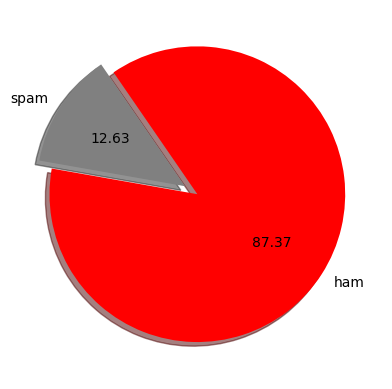

In [ ]:
# Plotting the count of Spam and Ham
import matplotlib.pyplot as plt
explode = (0, 0.1)
plt.pie(df['target'].value_counts(), labels=['ham', 'spam' ], autopct="%0.2f", colors=['red', 'gray'], shadow = True, startangle=170, explode = explode)
plt.show()

The above pie chart depicts that there is a lot of Ham messages and very few Spam messages.87.37% of the dataset contains the ham messages where 12.63% of the messages are the ham messages.So the data is unbalanced here. we are using the matplot lib for creating graphs in python.

In [ ]:
# Finding the patterns in the Spam and Ham Messages
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Here we have imported nltk(natural language tool kit). we use this library for seperating the characters.

In [ ]:
# Creating the column for the length of the content
df['CONTENT_LENGTH'] = df['content'].apply(len)
df.head()

,target,content,CONTENT_LENGTH
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


count characters gives the number of characters in each of the texts.

In [ ]:
# Creating a column for the number of words in the content
df['WORD_COUNT'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,content,CONTENT_LENGTH,WORD_COUNT
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


Here we have added another column where it counts the number of words.

In [ ]:
# Creating a column for the count of sentenses in the content
df['COUNT_SENTENCE'] = df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,content,CONTENT_LENGTH,WORD_COUNT,COUNT_SENTENCE
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


here the new columns count the number of sentences in each of the text.

In [ ]:
# Description of the new columns created
df[['CONTENT_LENGTH', 'WORD_COUNT','COUNT_SENTENCE']].describe()

,CONTENT_LENGTH,WORD_COUNT,COUNT_SENTENCE
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Description of the target variable HAM
df[df['target'] == 0][['CONTENT_LENGTH', 'WORD_COUNT', 'COUNT_SENTENCE']].describe()

,CONTENT_LENGTH,WORD_COUNT,COUNT_SENTENCE
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Description of the target variable SPAM
df[df['target'] == 1][['CONTENT_LENGTH', 'WORD_COUNT', 'COUNT_SENTENCE']].describe()

,CONTENT_LENGTH,WORD_COUNT,COUNT_SENTENCE
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


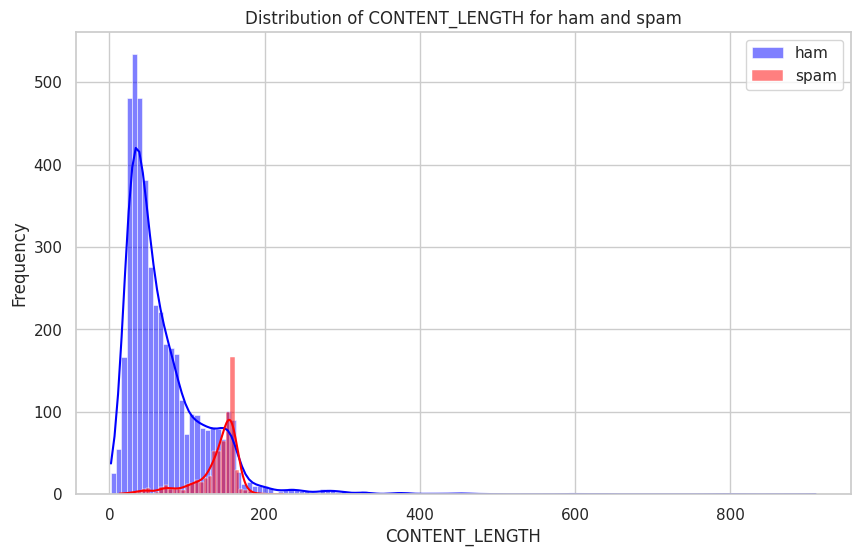

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for both target values
sns.histplot(df[df['target'] == 0]['CONTENT_LENGTH'], label='ham', kde=True, color='blue', ax=ax)
sns.histplot(df[df['target'] == 1]['CONTENT_LENGTH'], label='spam', kde=True, color='red', ax=ax)

# Set labels and title
plt.xlabel('CONTENT_LENGTH')
plt.ylabel('Frequency')
plt.title('Distribution of CONTENT_LENGTH for ham and spam')

# Show legend
plt.legend()

# Show the plot
plt.show()


Here we have defined the spam with the color red.From the above figure we can infer that Spam messages shows a trend of having less number of letters in the content.

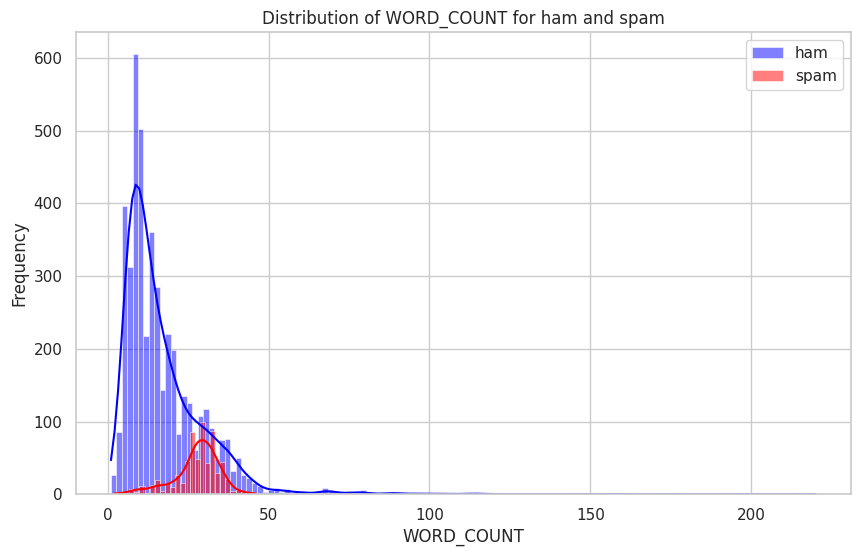

In [ ]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot histograms for both target values
sns.histplot(df[df['target'] == 0]['WORD_COUNT'], label='ham', kde=True, color='blue', ax=ax)
sns.histplot(df[df['target'] == 1]['WORD_COUNT'], label='spam', kde=True, color='red', ax=ax)

# Set labels and title
plt.xlabel('WORD_COUNT')
plt.ylabel('Frequency')
plt.title('Distribution of WORD_COUNT for ham and spam')

# Show legend
plt.legend()

# Show the plot
plt.show()

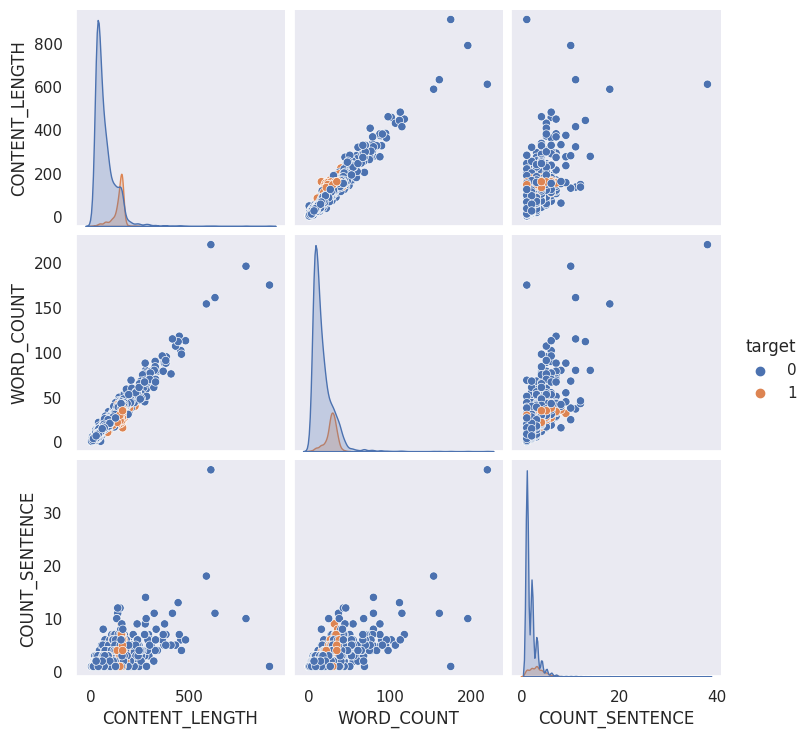

In [ ]:
sns.set(style="dark")
sns.pairplot(df, hue='target')

Here it gives the number of characters words and sentences together.it also visulizes the data spreading along the data set.

<ipython-input-38-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

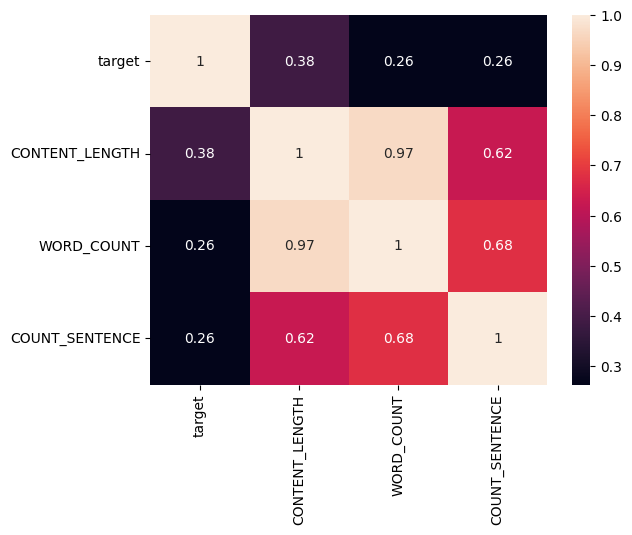

In [ ]:
sns.heatmap(df.corr(), annot = True)

We can now compare the attributes in both the spam and ham messages together using the heat map.For example, we can compare the number of characters with number of words etc. Considering the heat map we can see that as the number of characters, words or sentences incraeses there is high chance for it to be classified as spam. there is a strong positive correlation between the columns.the number of characters is closer to target which has the most correlation.So it probably uses it to build the model.

  # DATA PREPROCESSING


*   Content to Lower case
*   Tokenization-breaking down the sentences into words.
*   Removing Special characters
*   Removing the stop words and  Punctuation
*   Stemming







In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download ('stopwords') # You may need to download the stopwords dataset
ps = PorterStemmer ()


def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text=y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today")
print(transformed_text)

gon na home soon want talk stuff anymor tonight ok cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


All the punctuations and the characters will be removed and the text is transformed.

In [ ]:
df['transformed_text'] = df['content'].apply(transform_text)

In [ ]:
df.head()

,target,content,CONTENT_LENGTH,WORD_COUNT,COUNT_SENTENCE,transformed text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud (width=500, height=500,min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df [df['target'] == 1]['transformed_text'].str.cat (sep=" "))

In [ ]:
spam_wc

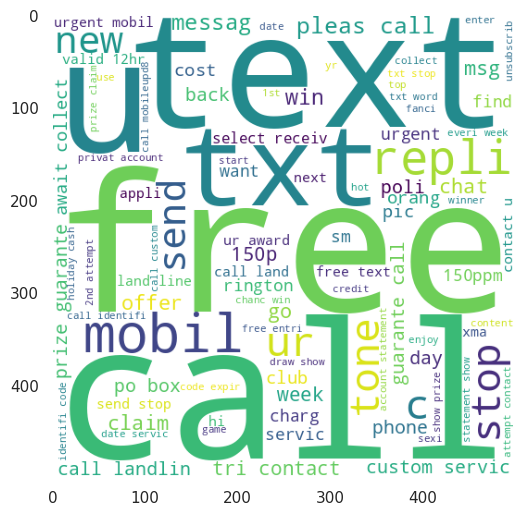

In [ ]:
plt. figure(figsize=(15,6))
plt.imshow(spam_wc)


These words are the most frequenly used words in the data set.

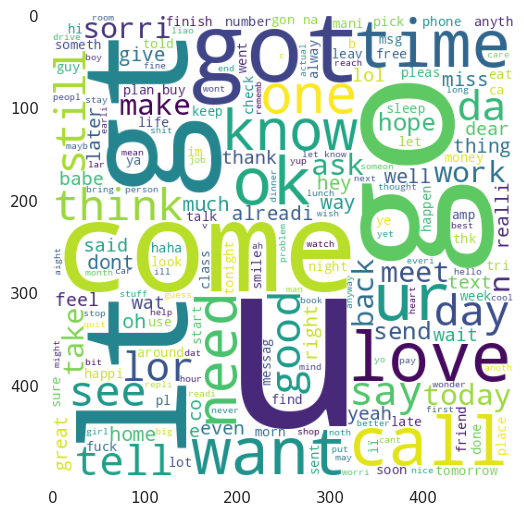

In [ ]:
ham_wc = wc.generate(df [df['target'] == 0]['transformed_text'].str.cat (sep=" "))
plt. figure(figsize=(15,6))
plt.imshow(ham_wc)


# MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
Using Multinomial Naive Bayes and Bernoulli Naive Bayes for prediction
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB() #  Multinomial Naive Bayes
bnb = BernoulliNB() # Bernoulli Naive Bayes



In [ ]:
# Training a Multinomial Naive Bayes (MNB) model,
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


The Multinomial Naive Bayes model achieved a really good accuracy of 97.10% in spotting spam emails correctly. The confusion matrix shows it's doing well in catching actual spam emails (108) and correctly recognizing non-spam emails (896). Additionally, the perfect precision score of 1.0 means that when it says an email is spam, it's almost always right.

In [ ]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


The Bernoulli Naive Bayes model demonstrated strong performance with an accuracy of 98.36%. The confusion matrix highlighted the model's effectiveness in correctly identifying spam (122 true positives) and non-spam emails (895 true negatives), with only a minimal number of misclassifications

**CONCLUSION**

In summary, both the email-checking models did a great job in telling us if an email is spam or not. The Multinomial one was accurate about 97.10% of the time, while the Bernoulli model did even better at 98.36%. This shows that these models are good at spotting spam and can help keep our email inboxes safer by separating out the spam messages.